## 1. Import & load libraries

In [1]:
%pip cache purge

%pip install mne
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scikit-learn


Files removed: 4 (38 kB)
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.python.org/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.python.org/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.python.org/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.python.org/simple
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.python.org/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip list


Package            Version
------------------ -----------
asttokens          3.0.0
certifi            2025.1.31
charset-normalizer 3.4.1
colorama           0.4.4
comm               0.2.2
contourpy          1.3.1
cycler             0.12.1
debugpy            1.8.12
decorator          5.1.1
exceptiongroup     1.2.2
executing          2.1.0
fonttools          4.56.0
idna               3.10
importlib_metadata 8.6.1
ipykernel          6.29.5
ipython            8.32.0
jedi               0.19.2
Jinja2             3.1.5
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.8
lazy_loader        0.4
MarkupSafe         3.0.2
matplotlib         3.9.4
matplotlib-inline  0.1.7
mne                1.9.0
nest_asyncio       1.6.0
numpy              2.0.2
packaging          24.2
pandas             2.2.3
parso              0.8.4
pexpect            4.9.0
pickleshare        0.7.5
pillow             11.1.0
pip                25.0
platformdirs       4.3.6
pooch      

In [3]:
import mne
from mne.datasets import eegbci
from mne.io import read_raw_edf
from mne.io import concatenate_raws
from mne.preprocessing import ICA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

import os
import sys
import re
import warnings
import glob
import logging

from typing import List, Tuple, Dict, Optional

sys.path.append(os.path.abspath(".."))
from utils.load_data import load_data
from utils.summarize_edf_files import summarize_edf_files
from utils.pca import analyze_eeg_pca


In [4]:
print("MNE version:", mne.__version__)


MNE version: 1.9.0


In [5]:
warnings.filterwarnings("ignore", message="FigureCanvasAgg is non-interactive, and thus cannot be shown")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Channel locations not available.*")


## 2. Info

### Experimental Protocol

This data set consists of over 1500 one- and two-minute EEG recordings, obtained from ***109 volunteers***, as described below.

Subjects performed different motor/imagery tasks while 64-channel EEG were recorded using the BCI2000 system (http://www.bci2000.org). Each subject performed ***14 experimental runs***: two one-minute baseline runs (one with eyes open, one with eyes closed), and three two-minute runs of each of the four following tasks:

- **TASK 1**: A target appears on either the left or the right side of the screen. The subject opens and closes the corresponding fist until the target disappears. Then the subject relaxes.
- **TASK 2**: A target appears on either the left or the right side of the screen. The subject imagines opening and closing the corresponding fist until the target disappears. Then the subject relaxes.
- **TASK 3**: A target appears on either the top or the bottom of the screen. The subject opens and closes either both fists (if the target is on top) or both feet (if the target is on the bottom) until the target disappears. Then the subject relaxes.
- **TASK 4**: A target appears on either the top or the bottom of the screen. The subject imagines opening and closing either both fists (if the target is on top) or both feet (if the target is on the bottom) until the target disappears. Then the subject relaxes.

### Description of data:

The experimental runs were:

- Baseline, eyes open
- Baseline, eyes closed
- Task 1 (open and close left or right fist)
- Task 2 (imagine opening and closing left or right fist)
- Task 3 (open and close both fists or both feet)
- Task 4 (imagine opening and closing both fists or both feet)

Each annotation includes one of three codes (T0, T1, or T2):

- **T0** corresponds to rest
- **T1** corresponds to onset of motion (real or imagined) of
        the left fist (in runs 3, 4, 7, 8, 11, and 12)
        both fists (in runs 5, 6, 9, 10, 13, and 14)
- **T2** corresponds to onset of motion (real or imagined) of
        the right fist (in runs 3, 4, 7, 8, 11, and 12)
        both feet (in runs 5, 6, 9, 10, 13, and 14)

| Run       | Task                                |
|-----------|-------------------------------------|
| 1         | Baseline, eyes open                 |
| 2         | Baseline, eyes closed               |
| 3, 7, 11  | Motor execution: left vs right hand |
| 4, 8, 12  | Motor imagery: left vs right hand   |
| 5, 9, 13  | Motor execution: hands vs feet      |
| 6, 10, 14 | Motor imagery: hands vs feet        |


The EEGs were recorded from 64 electrodes as per the international system (excluding electrodes Nz, F9, F10, FT9, FT10, A1, A2, TP9, TP10, P9, and P10)

<img width=100% src=../images/EGG_64.png>

<img width=100% src=../images/64_channel_sharbrough.png>


## 3. Load data

In [6]:
subjects = [1] # subjects to load (from 1 to 109 volunteers)

runs = [3]  # experimental runs for each subject
# runs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

raw_data = load_data(subjects, runs)


# data_path = mne.datasets.eegbci.load_data(1, [3], path="../data/raw/files/", update_path=True)
# print(f"\n📂 Data saved in: {data_path}")

if raw_data:
    print(f"\n✅ Data successfully loaded into: \n   📂 {os.path.abspath('../data/raw/files/')}")



=== Loading data from_volunteer 1 ===
Extracting EDF parameters from /home/dgerwig-/OneDrive/_code_42/42_Cursus_Outer_Core/vortex/42_vortex/data/files/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...

✅ Data successfully loaded into: 
   📂 /home/dgerwig-/OneDrive/_code_42/42_Cursus_Outer_Core/vortex/42_vortex/data/raw/files


In [7]:
print(raw_data)


<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.8 MiB, data loaded>


Using matplotlib as 2D backend.


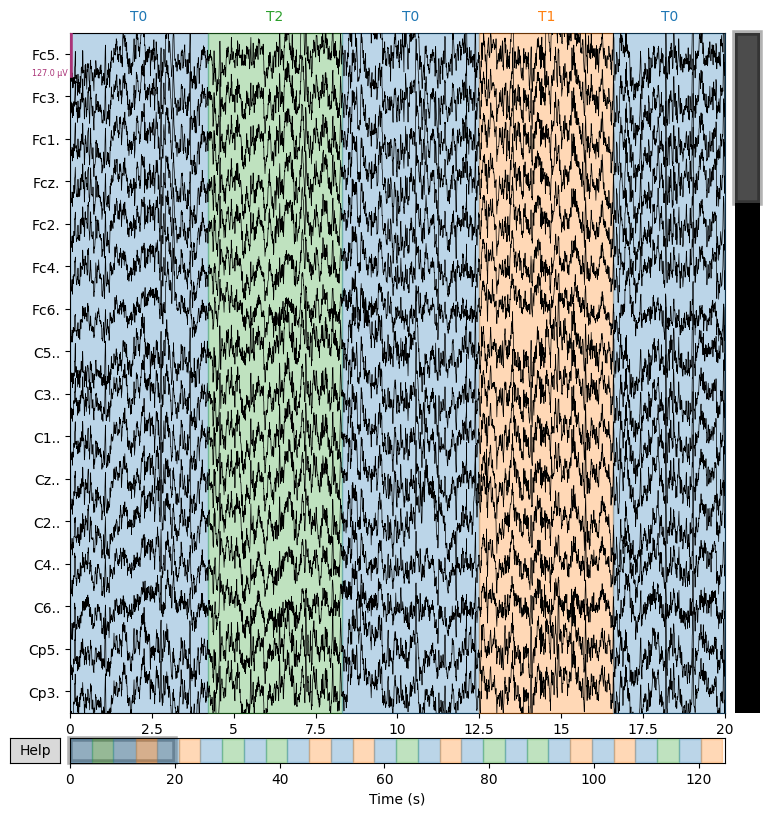

In [8]:
raw_data.plot(duration=20, n_channels=16, scalings='auto');


In [9]:
summarize_edf_files()


Found 1 EDF files in ../data/files/**:

File: MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf
  - Channels: 64
  - Length: 20000
  - Sampling Frequency: 160.0 Hz
----------------------------------------


In [10]:
raw_data.info?


Type:        Info
String form:
<Info | 9 non-empty values
           bads: []
           ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C <...>  64
           projs: []
           sfreq: 160.0 Hz
           subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
           >
Length:      36
File:        /sgoinfre/students/dgerwig-/miniforge/envs/vortex_env/lib/python3.11/site-packages/mne/_fiff/meas_info.py
Docstring:  
Measurement information.

This data structure behaves like a dictionary. It contains all metadata
that is available for a recording. However, its keys are restricted to
those provided by the
`FIF format specification <https://github.com/mne-tools/fiff-constants>`__,
so new entries should not be manually added.

.. note::
    This class should not be instantiated directly via
    ``mne.Info(...)``. Instead, use :func:`mne.create_info` to create
    measurement information from scratch.

.. warning::
    The only entries that should be manually changed b

In [11]:
print(raw_data)
print(raw_data.info)
print(raw_data.annotations)
print(raw_data.annotations.description)
print(raw_data.annotations.onset)
print(raw_data.info['ch_names'])


<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.8 MiB, data loaded>
<Info | 9 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 3 items (3 Cardinal)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>
<Annotations | 30 segments: T0 (15), T1 (8), T2 (7)>
['T0' 'T2' 'T0' 'T1' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1' 'T0' 'T1'
 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1' 'T0' 'T1' 'T0' 'T2'
 'T0' 'T1']
[  0.    4.2   8.3  12.5  16.6  20.8  24.9  29.1  33.2  37.4  41.5  45.7
  49.8  54.   58.1  62.3  66.4  70.6  74.7  78.9  83.   87.2  91.3  95.5
  99.6 103.8 107.9 112.1 116.2 120.4]
['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 

In [12]:
eegbci.standardize(raw_data)  # Standardize channel names
print(raw_data.info)
print(raw_data.info['ch_names'])


<Info | 9 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 3 items (3 Cardinal)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>
['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']


In [13]:
montage = mne.channels.make_standard_montage('standard_1005')
raw_data.set_montage(montage)


<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.8 MiB, data loaded>

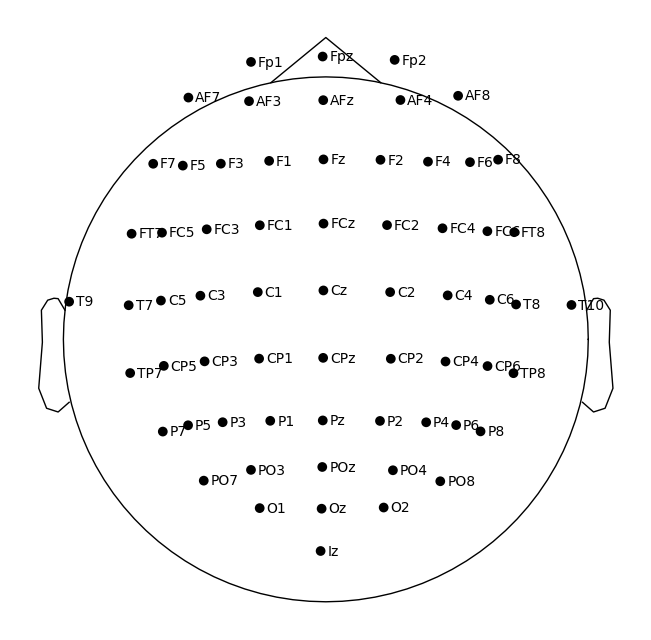

In [14]:
raw_data.plot_sensors(show_names=True);


## 4. Signal filtering

A Notch Filter (also called a Band-stop filter) is used to remove specific unwanted frequencies from a signal, particularly when a narrow frequency band causes interference or noise. In signal processing, the "notch" refers to the removal of frequencies within a small range, leaving the other frequencies untouched.

**How It Works:**

- Passband and Stopband:

	- The passband is the range of frequencies that the filter allows to pass through without attenuation.
	- The stopband is the range of frequencies that the filter suppresses.
	- A notch filter specifically targets and reduces a narrow band of frequencies (the notch), while passing frequencies outside of that band.

- Frequency Range:

	- The notch filter is designed to attenuate a specific frequency (or a small range of frequencies) while allowing the other frequencies to pass through. This is particularly useful when dealing with known interference frequencies, such as the power line frequency (50 Hz or 60 Hz) that can appear in many electrical signals.

**Applications of Notch Filters:** 
- Power line interference: In electrical signals, the 50 Hz or 60 Hz power line frequency is a common source of noise. The notch filter is used to remove this frequency without affecting the rest of the signal.
- Electroencephalography (EEG): In EEG data, notch filters are commonly applied to remove noise caused by electrical equipment, such as power line interference.
- Audio processing: It can also be used to remove hum or buzz noises caused by equipment, such as electrical hum from a microphone or speakers.
- Communication systems: To filter out specific unwanted frequencies or interference.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


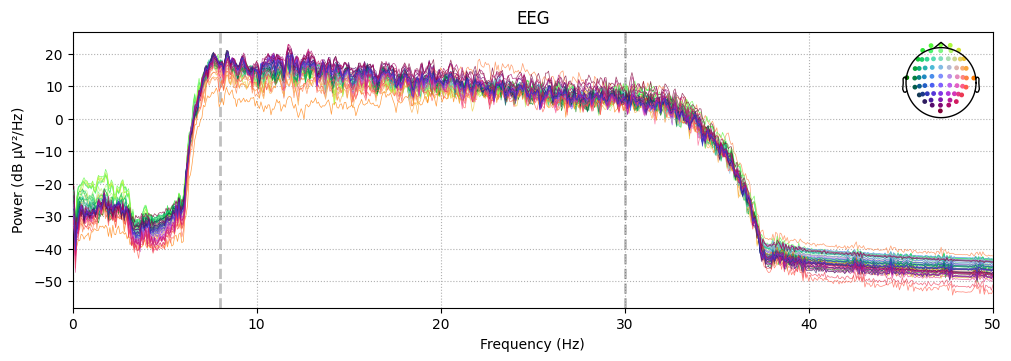

In [15]:
raw_data_filter = raw_data.copy()

# Apply bandpass filter (between 8 and 30 Hz for motor imagery)
low_cutoff = 8
high_cutoff = 30
raw_data_filter.filter(low_cutoff, high_cutoff, fir_design='firwin')

# Remove power line noise (50Hz in Europe, 60Hz in America)
raw_data_filter.notch_filter(freqs=[60], fir_design='firwin')

# Visualize after filtering
raw_data_filter.plot_psd(fmax=50)


## 5. Event extraction

In [18]:
# Show the events
events, event_id = mne.events_from_annotations(raw_data)
print(event_id)
print(events)


Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
{np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}
[[    0     0     1]
 [  672     0     3]
 [ 1328     0     1]
 [ 2000     0     2]
 [ 2656     0     1]
 [ 3328     0     2]
 [ 3984     0     1]
 [ 4656     0     3]
 [ 5312     0     1]
 [ 5984     0     3]
 [ 6640     0     1]
 [ 7312     0     2]
 [ 7968     0     1]
 [ 8640     0     2]
 [ 9296     0     1]
 [ 9968     0     3]
 [10624     0     1]
 [11296     0     2]
 [11952     0     1]
 [12624     0     3]
 [13280     0     1]
 [13952     0     3]
 [14608     0     1]
 [15280     0     2]
 [15936     0     1]
 [16608     0     2]
 [17264     0     1]
 [17936     0     3]
 [18592     0     1]
 [19264     0     2]]


Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 801 original time points ...
0 bad epochs dropped


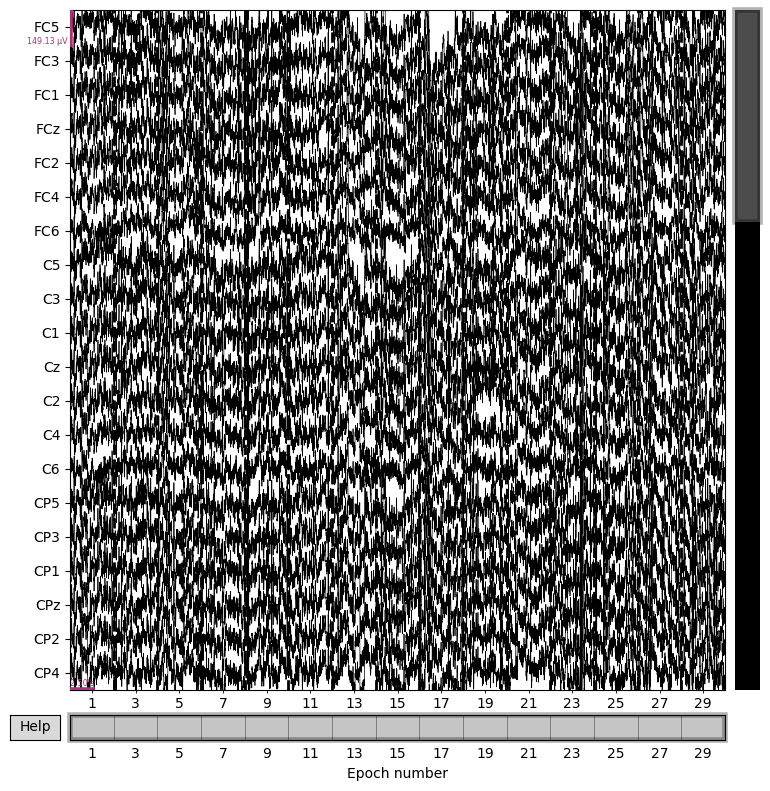

In [21]:
# Define epochs (signal segments)
tmin, tmax = -1., 4.  # Time before and after event
epochs = mne.Epochs(raw_data, events, event_id=dict(left=2, right=3), 
                   tmin=tmin, tmax=tmax, baseline=(None, 0),
                   preload=True)

# Visualize epochs
epochs.plot(scalings='auto');


In [22]:
# Replace the event_id keys with more meaningful names
event_id = {
    'rest' if k == np.str_('T0') else 
    'hands' if k == np.str_('T1') else 
    'feets': v 
    for k, v in event_id.items()
}
print(event_id)
print(events)


{'rest': 1, 'hands': 2, 'feets': 3}
[[    0     0     1]
 [  672     0     3]
 [ 1328     0     1]
 [ 2000     0     2]
 [ 2656     0     1]
 [ 3328     0     2]
 [ 3984     0     1]
 [ 4656     0     3]
 [ 5312     0     1]
 [ 5984     0     3]
 [ 6640     0     1]
 [ 7312     0     2]
 [ 7968     0     1]
 [ 8640     0     2]
 [ 9296     0     1]
 [ 9968     0     3]
 [10624     0     1]
 [11296     0     2]
 [11952     0     1]
 [12624     0     3]
 [13280     0     1]
 [13952     0     3]
 [14608     0     1]
 [15280     0     2]
 [15936     0     1]
 [16608     0     2]
 [17264     0     1]
 [17936     0     3]
 [18592     0     1]
 [19264     0     2]]


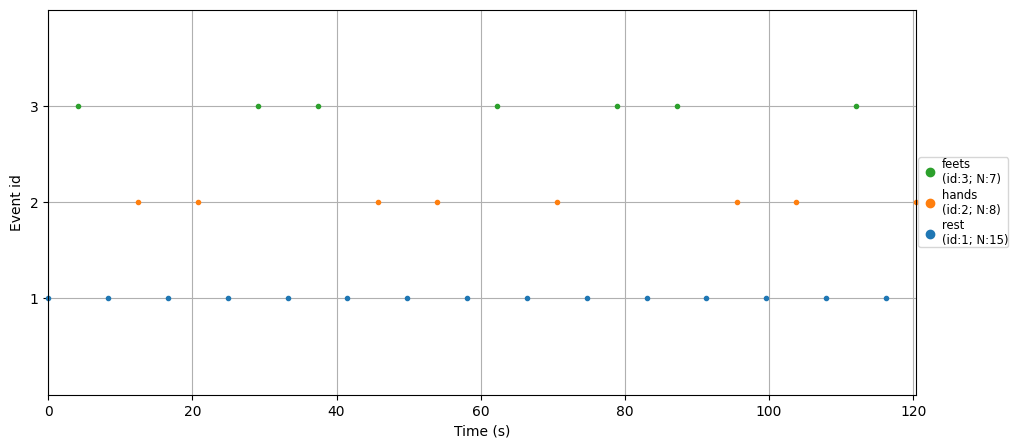

In [23]:
plt.rcParams["figure.figsize"] = (14, 5)
mne.viz.plot_events(events, sfreq=raw_data.info['sfreq'], 
                     first_samp=raw_data.first_samp, event_id=event_id)
plt.show()


Feature extraction using spectral analysis

NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Applying baseline correction (mode: percent)


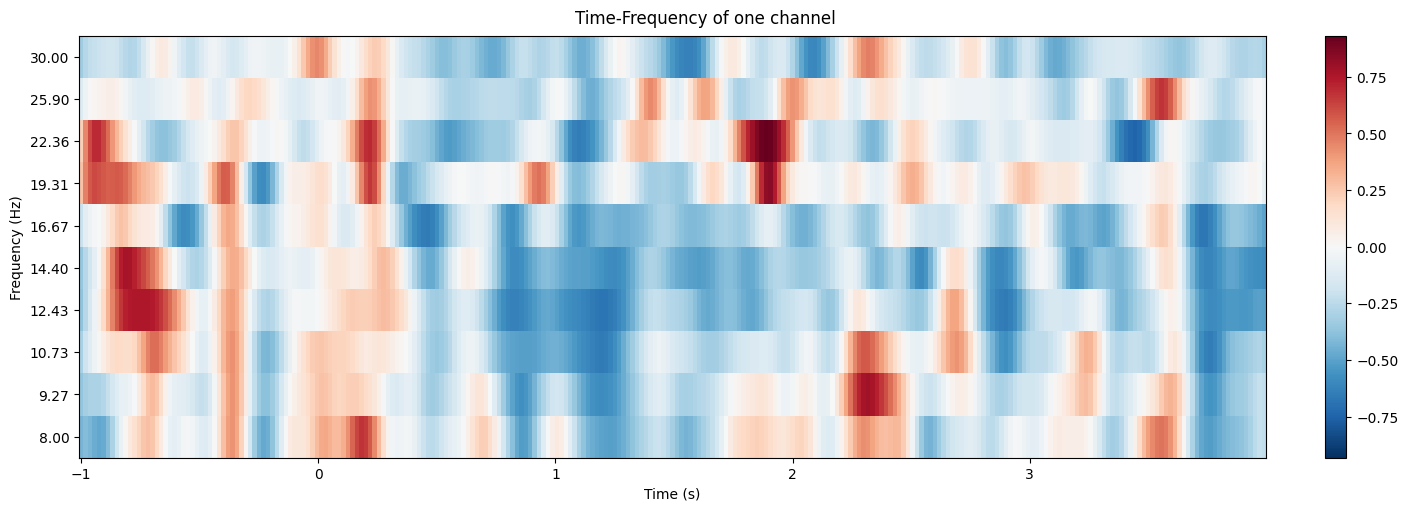

[<Figure size 1400x500 with 2 Axes>]

In [24]:
from mne.time_frequency import tfr_morlet

# Calculate spectral power using wavelets
freqs = np.logspace(*np.log10([8, 30]), num=10)
n_cycles = freqs / 2.
power = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, 
                   use_fft=True, return_itc=False, decim=3)

# Visualize time-frequency
power.plot([0], baseline=(-0.5, 0), mode='percent',
           title='Time-Frequency of one channel')


Feature preparation for machine learning

In [25]:

# Extract data and labels
X = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)
y = epochs.events[:, -1]  # Labels

# Reshape for ML (flatten features)
n_epochs, n_channels, n_times = X.shape
X_flat = X.reshape(n_epochs, n_channels * n_times)

# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


Function to visualize preprocessing quality

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)


Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_43324/1713460165.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


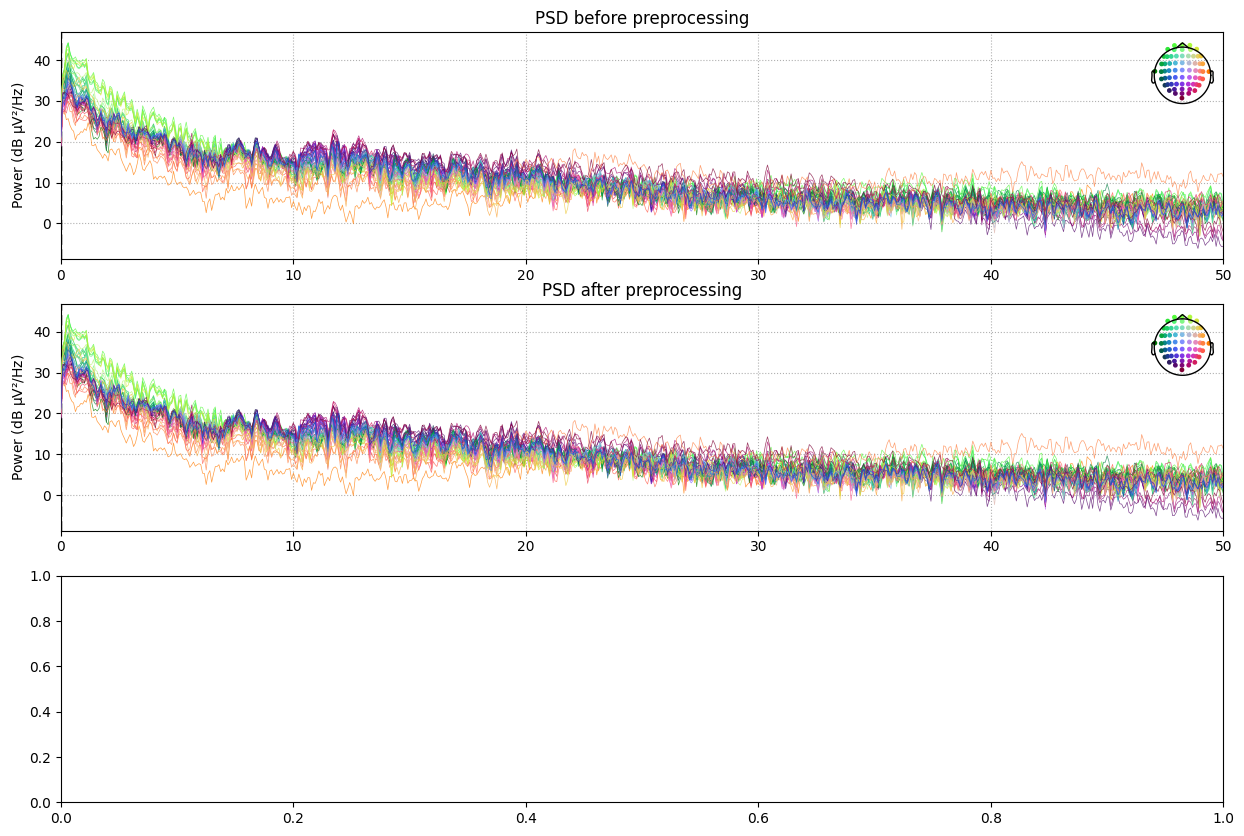

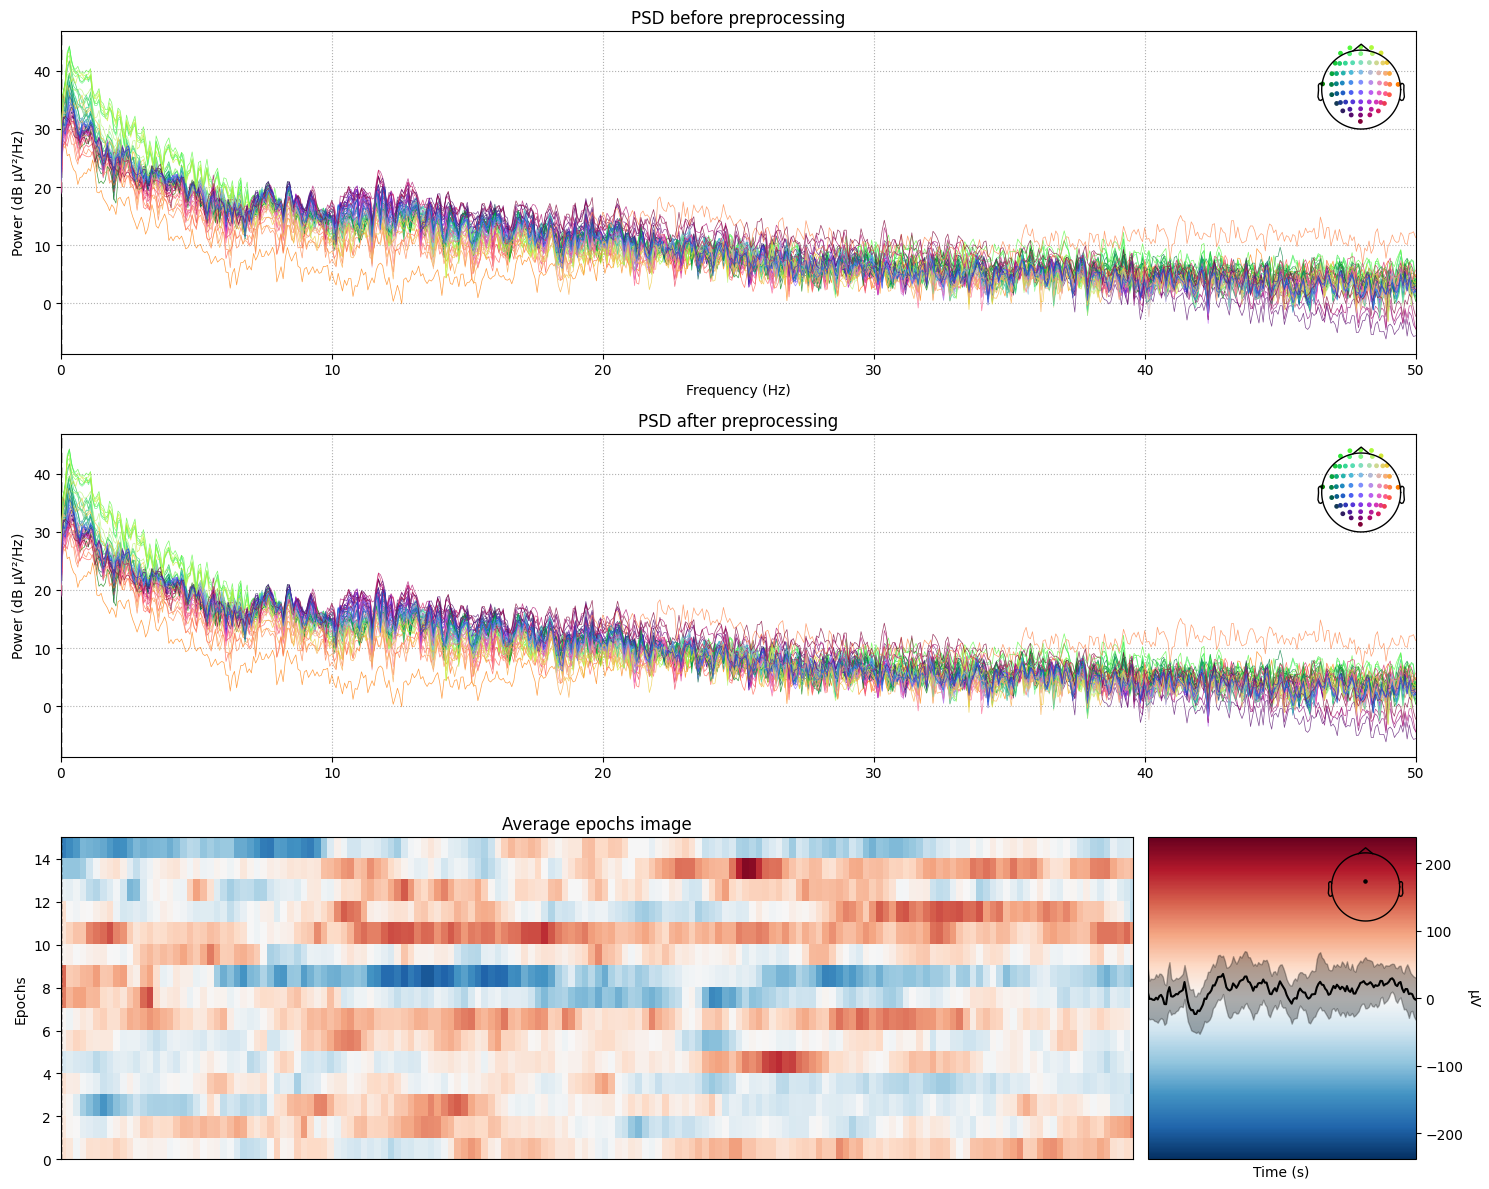

In [28]:
def plot_preprocessing_quality(raw_before, raw_after, epochs):
    # Create figure with proper layout for colorbar
    fig = plt.figure(figsize=(15, 12))
    
    # Create GridSpec for better control of subplot layout
    gs = plt.GridSpec(3, 2, width_ratios=[4, 1])  # 3 rows, 2 columns for colorbar
    
    # Plot PSDs
    ax1 = fig.add_subplot(gs[0, 0:])  # Span both columns
    raw_before.plot_psd(ax=ax1, fmax=50)
    ax1.set_title('PSD before preprocessing')
    
    ax2 = fig.add_subplot(gs[1, 0:])  # Span both columns
    raw_after.plot_psd(ax=ax2, fmax=50)
    ax2.set_title('PSD after preprocessing')
    
    # Plot epochs image with separate axes for colorbar
    ax3 = fig.add_subplot(gs[2, 0])  # Main plot
    ax_cbar = fig.add_subplot(gs[2, 1])  # Colorbar
    
    epochs.plot_image(picks=['Cz'], axes=[ax3, ax_cbar, ax_cbar],
                     colorbar=True, show=False)
    ax3.set_title('Average epochs image')
    
    plt.tight_layout()
    plt.show()

# Use the function
plot_preprocessing_quality(raw_data.copy(), raw_data, epochs)


Save preprocessed data:

In [33]:
models_dir = '../models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save preprocessed data
np.save(os.path.join(models_dir, 'X_preprocessed.npy'), X_scaled)
np.save(os.path.join(models_dir, 'y_labels.npy'), y)

# Save relevant preprocessing information
preprocessing_info = {
    'scaling': scaler,
    'channels': raw_data.info['ch_names'],
    'sfreq': raw_data.info['sfreq'],
    'shape_original': X.shape
}

# Save preprocessing information using pickle
with open(os.path.join(models_dir, 'preprocessing_info.pkl'), 'wb') as f:
    pickle.dump(preprocessing_info, f)

print(f"Files saved in {models_dir}:")
print("- X_preprocessed.npy")
print("- y_labels.npy")
print("- preprocessing_info.pkl")


Files saved in ../models:
- X_preprocessed.npy
- y_labels.npy
- preprocessing_info.pkl


In [ ]:
models_dir = '../models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save preprocessed data
np.save(os.path.join(models_dir, 'X_preprocessed.npy'), X_scaled)
np.save(os.path.join(models_dir, 'y_labels.npy'), y)

# Save relevant preprocessing information
preprocessing_info = {
    'scaling': scaler,
    'channels': raw_data.info['ch_names'],
    'sfreq': raw_data.info['sfreq'],
    'shape_original': X.shape
}

# Save preprocessing information using pickle
with open(os.path.join(models_dir, 'preprocessing_info.pkl'), 'wb') as f:
    pickle.dump(preprocessing_info, f)

print(f"Files saved in {models_dir}:")
print("- X_preprocessed.npy")
print("- y_labels.npy")
print("- preprocessing_info.pkl")


Files saved in ../models:
- X_preprocessed.npy
- y_labels.npy
- preprocessing_info.pkl


## 5. Select EEG channels

In [ ]:
# Select only EEG channels for further analysis 
picks = mne.pick_types(raw_data.info, meg=True, eeg=True, stim=False, eog=False, exclude='bads')
print(picks.shape)
print(picks)


In [ ]:
raw_data.plot(picks=picks);


## 6. Show PSD Power Spectral Density

The Power Spectral Density (PSD) is a way to analyze the frequency content of a signal. It tells us how the power of a signal is distributed across different frequencies. 

The PSD describes how the power (or variance) of a signal is distributed over different frequency components.

It is computed using the Fourier Transform, which decomposes a time-domain signal into its frequency components.

In [ ]:
psd = raw_data.compute_psd(picks=picks)
psd.plot();


In [ ]:
psd.plot(average=True);


## 7. Apply ICA Independent Component Analysis

ICA (Independent Component Analysis) is a technique used to separate mixed signals into independent components. In EEG/MEG analysis, it is mainly used to remove artifacts such as eye blinks, eye movements, and muscle noise.

ICA decomposes a signal into a set of statistically independent components, allowing us to identify and remove noise sources without affecting neural signals.

ICA is useful for:
- Removing eye blink artifacts (blinks)
- Removing eye movement and muscle artifacts
- Separating neural activity from external noise


In [ ]:
# Configure ICA
raw_data_ica = raw_data.copy()
raw_data_ica_filtered = raw_data_ica.filter(1, 70, picks=picks)
ica = ICA(n_components=25, random_state=42, method='fastica', max_iter=800)

# Fit ICA to the data
ica.fit(raw_data_ica_filtered, picks=picks)

# Plot ICA components
ica.plot_sources(raw_data_ica_filtered, picks=range(0, 25))
plt.show()


In [ ]:
ica.apply(raw_data_ica_filtered)


In [ ]:
raw_data_ica_filtered.plot(picks=picks);


In [ ]:
# Function to convert MNE plot to an image
def raw_plot_to_image(raw_data, picks):
    buf = BytesIO()
    fig = raw_data.plot(picks=picks, show=False)
    fig.savefig(buf, format='png', bbox_inches='tight', dpi=150)  # Reduce empty space
    plt.close(fig)
    buf.seek(0)
    return np.array(Image.open(buf))

# Create figure with tight layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Raw Data BEFORE ICA vs. AFTER ICA', fontsize=16, fontweight='bold')

# Plot BEFORE ICA
img_before = raw_plot_to_image(raw_data, picks)
axes[0].imshow(img_before)
axes[0].set_title('raw_data BEFORE ICA', fontsize=12)
axes[0].axis('off')  # Hide axes completely
axes[0].spines[:].set_visible(False)  # Hide borders

# Plot AFTER ICA
img_after = raw_plot_to_image(raw_data_ica_filtered, picks)
axes[1].imshow(img_after)
axes[1].set_title('raw_data AFTER ICA', fontsize=12)
axes[1].axis('off')  # Hide axes completely
axes[1].spines[:].set_visible(False)

# Use tight_layout to optimize spacing
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)  # Reduce the space between subplots

plt.show()


In [ ]:
psd_ica_raw = raw_data_ica_filtered.compute_psd(picks=picks, fmax=80)
psd_ica_raw.plot();


## 8. Notch filter

A Notch Filter (also called a Band-stop filter) is used to remove specific unwanted frequencies from a signal, particularly when a narrow frequency band causes interference or noise. In signal processing, the "notch" refers to the removal of frequencies within a small range, leaving the other frequencies untouched.

**How It Works:**

- Passband and Stopband:

	- The passband is the range of frequencies that the filter allows to pass through without attenuation.
	- The stopband is the range of frequencies that the filter suppresses.
	- A notch filter specifically targets and reduces a narrow band of frequencies (the notch), while passing frequencies outside of that band.

- Frequency Range:

	- The notch filter is designed to attenuate a specific frequency (or a small range of frequencies) while allowing the other frequencies to pass through. This is particularly useful when dealing with known interference frequencies, such as the power line frequency (50 Hz or 60 Hz) that can appear in many electrical signals.

**Applications of Notch Filters:** 
- Power line interference: In electrical signals, the 50 Hz or 60 Hz power line frequency is a common source of noise. The notch filter is used to remove this frequency without affecting the rest of the signal.
- Electroencephalography (EEG): In EEG data, notch filters are commonly applied to remove noise caused by electrical equipment, such as power line interference.
- Audio processing: It can also be used to remove hum or buzz noises caused by equipment, such as electrical hum from a microphone or speakers.
- Communication systems: To filter out specific unwanted frequencies or interference.

In [ ]:
# Notch filter
notch_freq = 60
raw_data_ica_notch = raw_data_ica_filtered.notch_filter(notch_freq, fir_design='firwin')
raw_data_ica_notch.compute_psd().plot();


In [ ]:
# Band-pass filter keep only alpha and beta waves
low_cutoff = 8
high_cutoff = 30
raw_data_ica_notch.filter(low_cutoff, high_cutoff, fir_design='firwin')
raw_data_ica_notch.compute_psd().plot();
raw_data_ica_notch.compute_psd().plot(average=True);


In [ ]:
# Function to convert MNE plot to an image
def raw_plot_to_image(raw_data, picks):
    buf = BytesIO()
    fig = raw_data.plot(picks=picks, show=False)
    fig.savefig(buf, format='png', bbox_inches='tight', dpi=150)  # Reduce empty space
    plt.close(fig)
    buf.seek(0)
    return np.array(Image.open(buf))

# Create figure with tight layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Raw Data BEFORE NOTCH vs. AFTER NOTCH', fontsize=16, fontweight='bold')

# Plot BEFORE NOTCH
img_before = raw_plot_to_image(raw_data_ica_filtered, picks)
axes[0].imshow(img_before)
axes[0].set_title('raw_data BEFORE NOTCH', fontsize=12)
axes[0].axis('off')  # Hide axes completely
axes[0].spines[:].set_visible(False)  # Hide borders

# Plot AFTER NOTCH
img_after = raw_plot_to_image(raw_data_ica_notch, picks)
axes[1].imshow(img_after)
axes[1].set_title('raw_data AFTER NOTCH', fontsize=12)
axes[1].axis('off')  # Hide axes completely
axes[1].spines[:].set_visible(False)

# Use tight_layout to optimize spacing
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)  # Reduce the space between subplots

plt.show()


## 9. Analysis PCA

PCA (Principal Component Analysis) is like taking a photo of complex data from different angles to find the best view that shows the most important information.

***Simple Example:***

Imagine you have photos of faces:

Instead of describing each face with hundreds of pixels
PCA finds the main "features" like: overall shape, eye size, smile, etc.
These main features are the "principal components"
You can describe most faces with just these key features

**In EEG Context:**

- *Starting Point:*
	- You have EEG data with many channels (64 electrodes)
	- Each channel records brain activity
	- Too much data to analyze easily

- *What PCA Does:*
	- Finds the most important patterns in your data
	- Combines related channels into "components"
	- Ranks these components by importance
	- Lets you keep only the important ones

- *Key Benefits:*
	- Reduces noise in the data
	- Makes the data easier to analyze
	- Helps identify main patterns of brain activity

In [ ]:
raw_data = raw_data_ica_notch.copy().get_data()

results = analyze_eeg_pca(raw_data, variance_threshold=98.0)

print("\nPCA Analysis Summary:")
print(f"Optimal number of components: {results['n_components']}")
print("\nComponent details:")
print(results['components_df'].head(results['n_components']))
